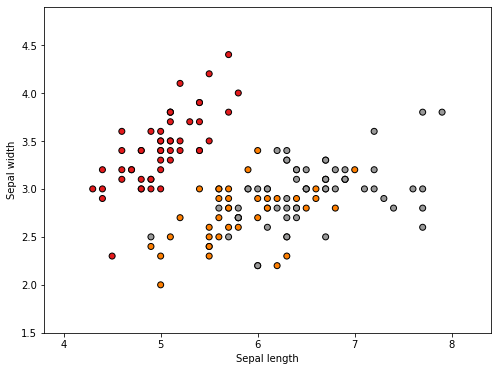

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

%matplotlib inline

# load Iris datasets 
iris = datasets.load_iris()

# here we only select sepal length and width (select first 2 columns)
X = iris.data[:, :2]  
y = iris.target

# visualization을 위하여 lim 설정
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

num : integer or string, optional, default: None
<br>
<br>If not provided, a new figure will be created, and the **figure number will be incremented.** 

The figure objects **holds this number in a number attribute.** If num is provided, and a **figure with this id already exists, make it active, and returns a reference to it.** If this figure does not exists, create it and returns it. If num is a string, the window title will be set to this figure's num.

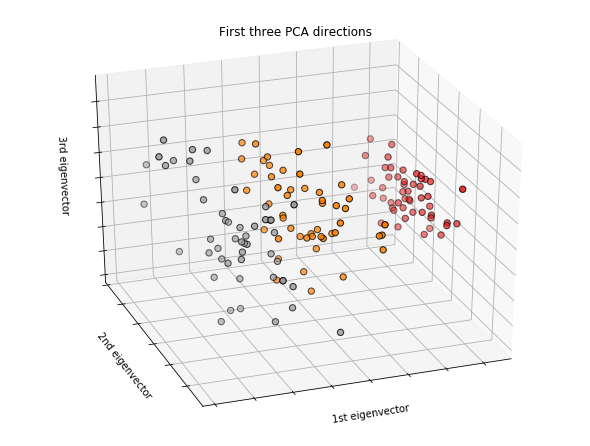

In [102]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [44]:
clf = KNeighborsClassifier()

In [45]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
prediction = clf.predict(x_test)

In [67]:
print("clf.score             : {0:.3f}".format(clf.score(x_train, y_train)))
print("(pred == y_test) score: {0:.3f}".format((prediction==y_test).mean()))
print("cross_val_score       : {0:.3f}".format(cross_val_score(clf, x_train, y_train, cv=10).mean()))

clf.score             : 0.830
(pred == y_test) score: 0.763
cross_val_score       : 0.774


In [85]:
train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    train_acc.append(clf.score(x_train, y_train))
    test_acc.append((prediction==y_test).mean())

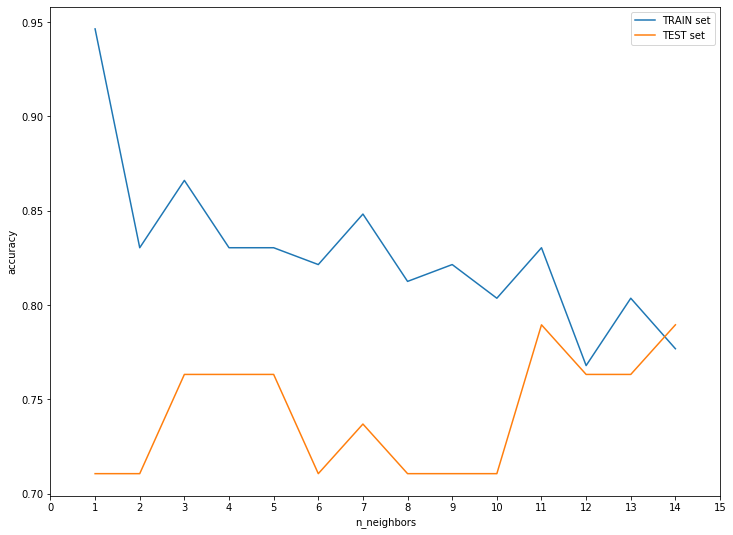

In [93]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()